<a href="https://colab.research.google.com/github/GaworO/Sales/blob/main/Sales.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#This challenge serves as final project for the "How to win a data science competition" Coursera course.
#In this competition you will work with a challenging time-series dataset consisting of daily sales data, 
#kindly provided by one of the largest Russian software firms - 1C Company. 
#We are asking you to predict total sales for every product and store in the next month. 
#By solving this competition you will be able to apply and enhance your data science skills.

In [2]:
#ID - an Id that represents a (Shop, Item) tuple within the test set
#shop_id - unique identifier of a shop
#item_id - unique identifier of a product
#item_category_id - unique identifier of item category
#item_cnt_day - number of products sold. You are predicting a monthly amount of this measure
#item_price - current price of an item
#date - date in format dd/mm/yyyy
#date_block_num - a consecutive month number, used for convenience. January 2013 is 0, February 2013 is 1,..., October 2015 is 33
#item_name - name of item
#shop_name - name of shop
#item_category_name - name of item category
#This dataset is permitted to be used for any purpose, including commercial use.

# TO DO :
1) AR
2) MA
3) ARMA
4) ARIMA
5) Prophet 


In [3]:
import pandas as pd
from google.colab import drive
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.arima_model import ARIMA
drive.mount('/content/drive')

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Mounted at /content/drive


In [4]:
item_categories = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Sales/data/item_categories.csv", sep=",")
items = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Sales/data/items.csv", sep=",")
sales_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Sales/data/sales_train.csv", sep=",")
sample_submission = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Sales/data/sample_submission.csv", sep=",")
shops = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Sales/data/shops.csv", sep=",")
test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Kaggle Sales/data/test.csv", sep=",")

In [5]:
test.head()

,ID,shop_id,item_id
0,0,5,5037
1,1,5,5320
2,2,5,5233
3,3,5,5232
4,4,5,5268


In [6]:
#The task is to forecast the total amount of products sold in every shop for the test set.

In [9]:
item_categories = item_categories.join(items.set_index('item_category_id'), on='item_category_id')

In [10]:
#select one category id as an exmple
item_categories[item_categories["item_category_id"] == 51]

,item_category_name,item_category_id,item_name,item_id
51,Книги - Познавательная литература,51,Правила дорожного движения 2009. Новейшая мето...,17703


In [122]:
#join item categories with sales prodcuts to get the date and prices
sales_products = sales_train.join(item_categories.set_index("item_id"), on="item_id")
sales_products.head()

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_name,item_category_id,item_name
0,02.01.2013,0,59,22154,999.00,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
1,03.01.2013,0,25,2552,899.00,1.0,Музыка - Винил,58,DEEP PURPLE The House Of Blue Light LP
2,05.01.2013,0,25,2552,899.00,-1.0,Музыка - Винил,58,DEEP PURPLE The House Of Blue Light LP
3,06.01.2013,0,25,2554,1709.05,1.0,Музыка - Винил,58,DEEP PURPLE Who Do You Think We Are LP
4,15.01.2013,0,25,2555,1099.00,1.0,Музыка - CD фирменного производства,56,DEEP PURPLE 30 Very Best Of 2CD (Фирм.)


In [34]:
# EDA
# can we group shops to different baskets? -> done
# how many shops do we have?
# what is an average of products per shop?
# what is an average of items sold per shop?
# how many categories shows have?
# when shops have the highesr sales?
# when shops have the highest income?
# jakie produkty sa najczesciej sprzedawane jednego dnia w zestawach ? - analiza koszykowa


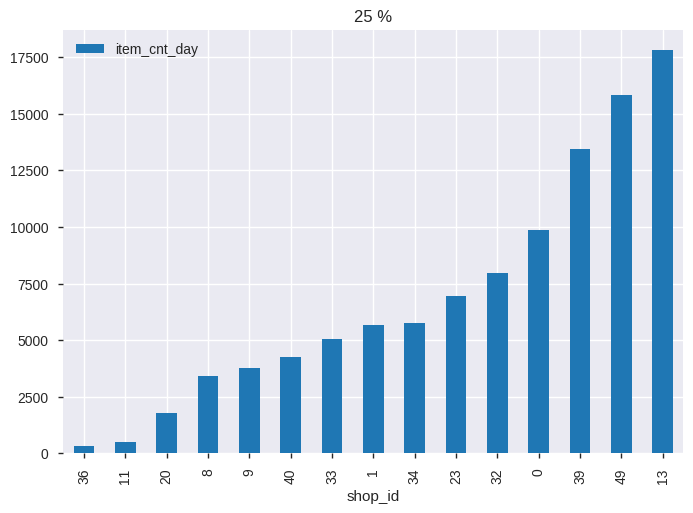

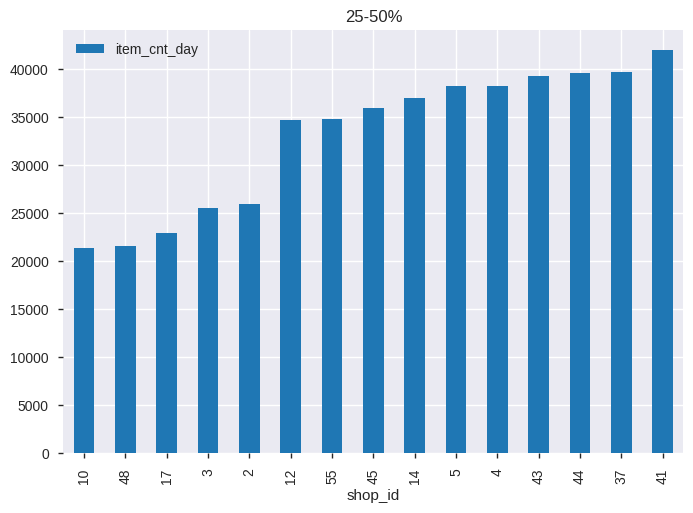

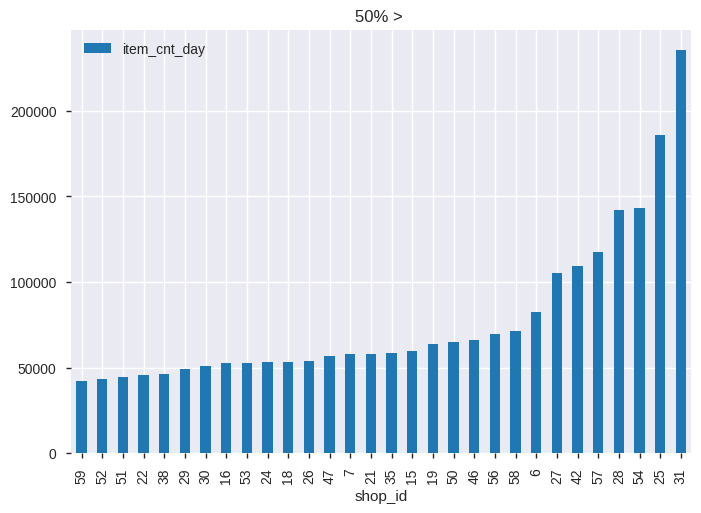

In [123]:
 # podzielilabym sklepy na baskets w zależności od ilości produktow ktore sprzedaja
sales_products=sales_products.groupby(["shop_id"]).agg({"item_cnt_day":"count"}) \
                      .sort_values(by="item_cnt_day")
sales_products.loc[lambda x: x['item_cnt_day'] < 20504].plot.bar(title="25 %")
sales_products.loc[lambda x: x['item_cnt_day'].between(20504,42037)].plot.bar(title="25-50%")
sales_products.loc[lambda x: x['item_cnt_day'] > 42037].plot.bar(title="50% > ")          



In [ ]:
# TIME SERIES ANALYSIS EXAPLE SHOP

In [12]:
sales_products_0 = sales_products[["date", "shop_id","item_id", "item_cnt_day"]] \
              .groupby(["date","shop_id", "item_id"]) \
              .agg({"item_cnt_day": "count"}) \
              .reset_index() \
              .loc[lambda x: x['shop_id'] == 0]
             # .iloc(sales_products["shop_id"] == 0 )

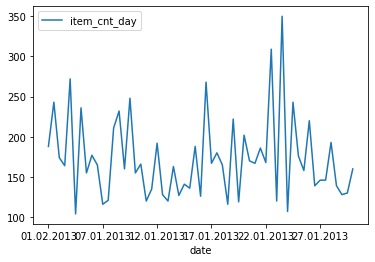

In [13]:
sales_products_0 = sales_products_0[["date", "item_cnt_day"]].groupby(["date"]).agg({"item_cnt_day":"count"})
sales_products_0.plot()
pyplot.show()

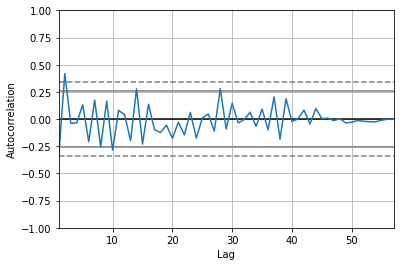

In [14]:
# AUTOCORELATION
autocorrelation_plot(sales_products_0)
pyplot.show()

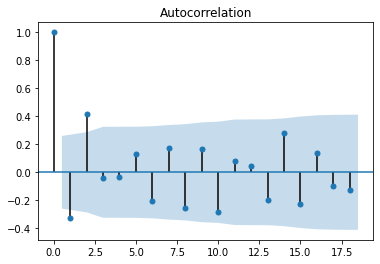

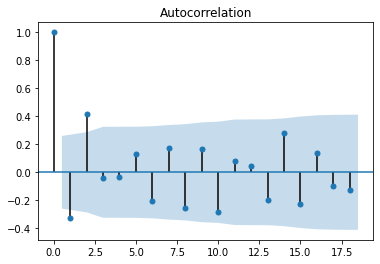

In [15]:
plot_acf(sales_products_0)

In [16]:
# ARIMA 
model = ARIMA(sales_products_0, order=(3,1,0))
model_fit = model.fit()

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:219: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


In [17]:
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:         D.item_cnt_day   No. Observations:                   56
Model:                 ARIMA(3, 1, 0)   Log Likelihood                -295.328
Method:                       css-mle   S.D. of innovations             46.656
Date:                Sun, 04 Apr 2021   AIC                            600.655
Time:                        10:55:46   BIC                            610.782
Sample:                             1   HQIC                           604.582
                                                                              
                           coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                   -1.2649      2.586     -0.489      0.627      -6.334       3.804
ar.L1.D.item_cnt_day    -1.0974      0.133     -8.266      0.000      -1.358      -0.837
ar.L2.D.item

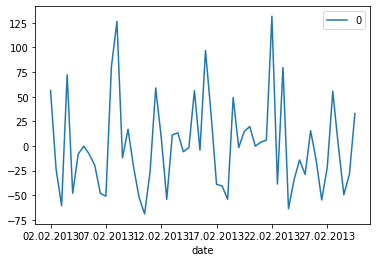

In [18]:
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
pyplot.show()

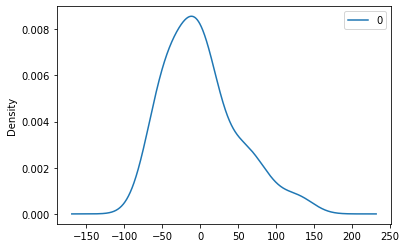

In [19]:
residuals.plot(kind='kde')
pyplot.show()

In [20]:
print(residuals.describe())

                0
count   56.000000
mean     0.743752
std     47.507332
min    -68.938623
25%    -35.382019
50%     -5.043608
75%     17.699226
max    131.623119


In [21]:
#PROPHET 


In [22]:
#have a look which categories have the most and the least products
item_categories.groupby(["item_category_id"]).agg({"item_id": "count"}).sort_values(by="item_id", ascending=False)

,item_id
item_category_id,
40,5035
55,2365
37,1780
31,1125
58,790
...,...
1,2
50,2
10,1


In [23]:
sales_products[sales_products["shop_id"] == 59]

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day,item_category_name,item_category_id,item_name
0,02.01.2013,0,59,22154,999.0,1.0,Кино - Blu-Ray,37,ЯВЛЕНИЕ 2012 (BD)
40084,10.01.2013,0,59,22151,399.0,1.0,Кино - DVD,40,ЯВЛЕНИЕ (2012)
77502,04.01.2013,0,59,5603,699.0,1.0,Аксессуары - PSVita,5,PS Vita: Чехол 4gamers Travel Case дорожный го...
77503,19.01.2013,0,59,5587,199.0,2.0,Аксессуары - PSVita,5,PS Vita/PSP: Наушники Hama HK-3023
77504,31.01.2013,0,59,5613,5571.0,1.0,Аксессуары - PS3,2,PS3: Гарнитура беспроводная для PS3 (с поддерж...
...,...,...,...,...,...,...,...,...,...
2899654,10.10.2015,33,59,4962,298.0,1.0,Игры PC - Стандартные издания,30,"Murdered: Soul Suspect [PC, Jewel, русская вер..."
2899655,04.10.2015,33,59,4706,299.0,1.0,Музыка - CD локального производства,55,MUSE Drones
2899656,11.10.2015,33,59,5002,2999.0,1.0,Игры - PS3,19,"NBA 2K16 [PS3, русская документация]"
2899657,15.10.2015,33,59,5233,1199.0,1.0,Игры - PS3,19,"Need for Speed Rivals (Essentials) [PS3, русск..."
